## Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. Load the cleaned categorical and numerical dataframes that you saved at the end of Monday's labs.

Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.

2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

3. Use X_train_num to fit scalers.  Transform BOTH X_train_num and X_test_num.

4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

6. Try a simple linear regression with all the data to see whether we are getting good results.

7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

8. Use the function to check LinearRegressor and KNeighborsRegressor.

9. You can check also the MLPRegressor for this task!

10. Check and discuss the results.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import numerical and categorcal data from previous lab
numerical = pd.read_csv("numerical.csv")
categorical = pd.read_csv("categorical.csv")

In [3]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [4]:
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,year,month,weekday
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-24,2011,February,Thursday
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011-01-31,2011,January,Monday
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-19,2011,February,Saturday
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize,2011-01-20,2011,January,Thursday
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011-02-03,2011,February,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011-02-10,2011,February,Thursday
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011-02-12,2011,February,Saturday
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011-02-06,2011,February,Sunday
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large,2011-02-03,2011,February,Thursday


In [5]:
# concat numerical and categorical data
data = pd.concat([numerical,categorical], axis = 1)

In [6]:
# X y split and dropping the target column

X = data.drop(['total_claim_amount'],axis=1)
y = data['total_claim_amount']

In [7]:
# drop redundant columns
X = X.drop(['year'],axis=1)

In [8]:
# drop redundant columns
X = X.drop(['effective_to_date'],axis=1)

In [9]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
Xtrain=pd.DataFrame(X_train)
Xtest=pd.DataFrame(X_test)

In [11]:
# separating numerical data from train and test data
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1461,14082.639180,0,102,17,91,0,2
2521,8133.157212,32021,70,12,58,0,2
9031,2933.498052,0,78,22,98,0,1
5045,2217.664193,0,65,11,69,0,1
4987,14019.833140,31739,71,10,29,0,2


In [12]:
# scaling numerical values using standard scaler

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [13]:
# converting array into dataframe 

numericals_test_standardized= pd.DataFrame(numericals_test_standardized).reset_index(drop=True)
numericals_train_standardized= pd.DataFrame(numericals_train_standardized).reset_index(drop=True)

In [14]:
# separating categorical variabes

categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,weekday
1461,Washington,No,Premium,College,Unemployed,M,Suburban,Single,Personal L3,Offer1,Agent,Four-Door Car,Large,January,Wednesday
2521,Arizona,No,Basic,Bachelor,Employed,F,Suburban,Single,Personal L2,Offer1,Call Center,Four-Door Car,Small,January,Tuesday
9031,California,No,Extended,Master,Unemployed,M,Suburban,Married,Personal L3,Offer1,Branch,Four-Door Car,Medsize,January,Saturday
5045,Arizona,No,Basic,College,Unemployed,M,Rural,Divorced,Personal L2,Offer4,Branch,Four-Door Car,Medsize,February,Saturday
4987,Oregon,No,Basic,College,Employed,M,Suburban,Divorced,Personal L3,Offer4,Call Center,Two-Door Car,Small,February,Friday


In [15]:
# encoding non ordinal categorical variables using onehot encoder

from sklearn.preprocessing import OneHotEncoder

# Define the list of categorical columns
categorical_cols = ['state', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'response', 'gender', 'month', 'weekday']

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(categoricals_train[categorical_cols])

# Encode categorical features for both the training and test datasets
categoricals_train_encoded = encoder.transform(categoricals_train[categorical_cols]).toarray().copy()
categoricals_test_encoded = encoder.transform(categoricals_test[categorical_cols]).toarray().copy()

In [16]:
# encoding ordinal categorical variables by mapping 

def encodecolordinal(df):
    # Create a copy of the DataFrame to preserve the original index order
    encoded_df = df.copy()

    # Define the mapping dictionaries
    coverage_mapping = {"Basic": 0, "Extended": 1, "Premium": 2}
    employmentstatus_mapping = {"Employed": 0, "Unemployed": 1, "Medical Leave": 2, "Disabled": 3, "Retired": 4}
    location_code_mapping = {"Suburban": 0, "Rural": 1, "Urban": 2}
    vehicle_size_mapping = {"Small": 0, "Medsize": 1, "Large": 2}
    education_mapping = {"High School or Below": 0, "College": 1, "Bachelor": 2, "Master": 3, "Doctor": 4}

    # Apply the mapping to the respective columns
    encoded_df["coverage"] = df["coverage"].map(coverage_mapping)
    encoded_df["employmentstatus"] = df["employmentstatus"].map(employmentstatus_mapping)
    encoded_df["location_code"] = df["location_code"].map(location_code_mapping)
    encoded_df["vehicle_size"] = df["vehicle_size"].map(vehicle_size_mapping)
    encoded_df["education"] = df["education"].map(education_mapping)

    return encoded_df

# Call the function to encode the specified columns
encoded_categoricals_test = encodecolordinal(categoricals_test).copy()
encoded_categoricals_train = encodecolordinal(categoricals_train).copy()


In [17]:
# Define the list of categorical columns to select
selected_categorical_cols = ["coverage", "employmentstatus", "location_code", "vehicle_size", "education"]

# Select the specified categorical columns from the categoricals_test DataFrame
categoricals_ordinal_test = encoded_categoricals_test[selected_categorical_cols].copy().reset_index(drop=True)
categoricals_ordinal_train = encoded_categoricals_train[selected_categorical_cols].copy().reset_index(drop=True)

In [18]:
categoricals_train_encoded=pd.DataFrame(categoricals_train_encoded).reset_index(drop=True)
categoricals_test_encoded=pd.DataFrame(categoricals_test_encoded).reset_index(drop=True)

In [19]:
# merging ordinal and one hot encoded categorical variables
categorical_train = pd.concat([categoricals_train_encoded, categoricals_ordinal_train], axis=1)
categorical_test = pd.concat([categoricals_test_encoded, categoricals_ordinal_test], axis=1)

In [20]:
categorical_train

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,coverage,employmentstatus,location_code,vehicle_size,education
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2,1,0,2,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,2
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1,1,0,1,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,1,1,1,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1,0,2,0,1
7303,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,4,0,0,1
7304,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0
7305,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2,0,0,2,2


In [21]:
categorical_test

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,coverage,employmentstatus,location_code,vehicle_size,education
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0,1,0,1,2
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2,0,0,0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,2,0,1,2
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,1
1823,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2,0,2,1,0
1824,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,1,0,2,0
1825,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,1,0,1,1


In [22]:
# merging numerical and categorical variables into one dataframe for model application

X_train2=pd.concat([numericals_train_standardized ,categorical_train], axis=1)
X_test2=pd.concat([numericals_test_standardized ,categorical_test], axis=1)

In [23]:
# linear regression model

#import libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# lm = linear_model.LinearRegression()
# lm.fit(X_test2,y_test)

# predictions = lm.predict(X_train2)
# r2_y_train=r2_score(y_train, predictions)

# predictions_test = lm.predict(X_test2)
# r2_score(y_test, predictions_test)

# mse = mean_squared_error(y_test,predictions_test)
# print('The mean squared error is: ' + str(mse))

# rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
# print('The root mean squared error is: ' + str(rmse))

# mae = mean_absolute_error(y_test, predictions_test)
# print('The mean absolute error is: ' + str(mae))

# r2 = r2_score(y_test, predictions_test)
# print(('The r squared value is: ' + str(r2)))

In [24]:
# function to compare the effect of using different models

def modelauto( models, X_tr, y_tr,X_te,y_te):
    for model in models:
        model.fit(X_tr,y_tr)
        print(f"{model.__class__.__name__}: Train ->{model.score(X_tr,y_tr)}, Test ->{model.score(X_te,y_te)}")

In [25]:
# importing libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
X_train2.columns = X_train2.columns.astype(str)
X_test2.columns = X_test2.columns.astype(str)

In [27]:
# applying function to show the results for each model

modellist=[LinearRegression(), KNeighborsRegressor(n_neighbors=3), MLPRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]
modelauto(modellist, X_train2,y_train,X_test2,y_test)

LinearRegression: Train ->0.6286208332760468, Test ->0.6085970383272539
KNeighborsRegressor: Train ->0.7880420910384925, Test ->0.5697305998836415


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train ->0.7016302556076341, Test ->0.6714008017740194
DecisionTreeRegressor: Train ->1.0, Test ->0.6977809533105286
RandomForestRegressor: Train ->0.9779565369371255, Test ->0.8411803879089862


the model which gives the best result is RandomForestRegressor

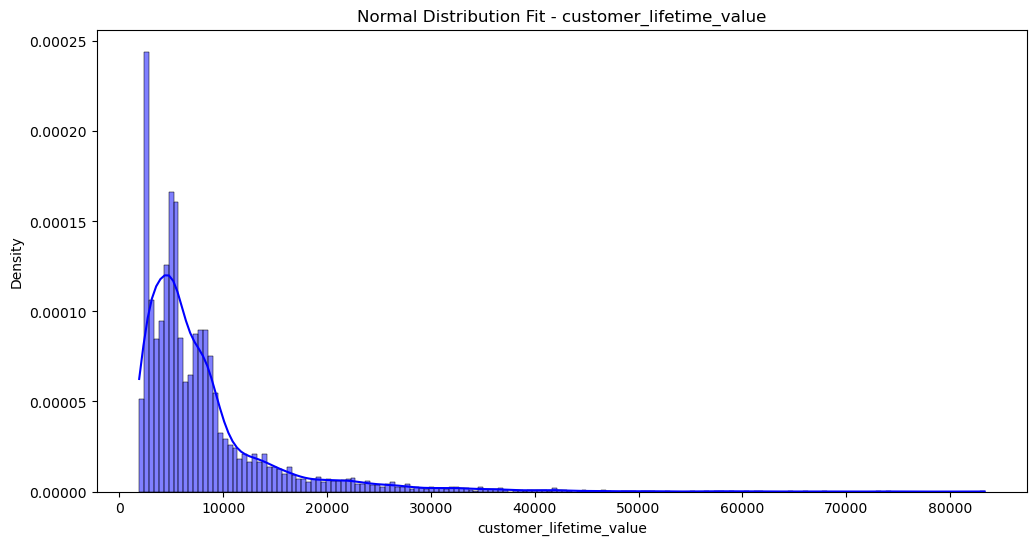

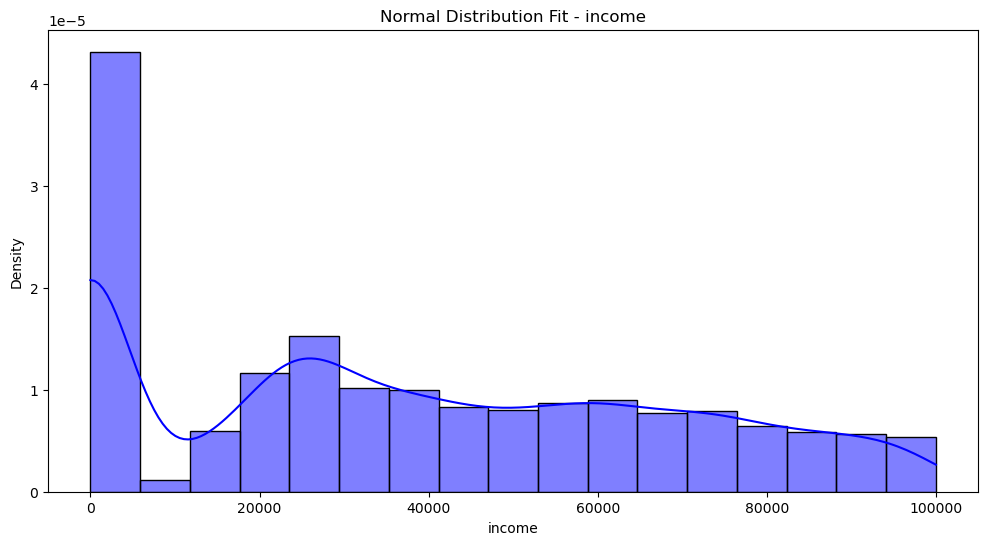

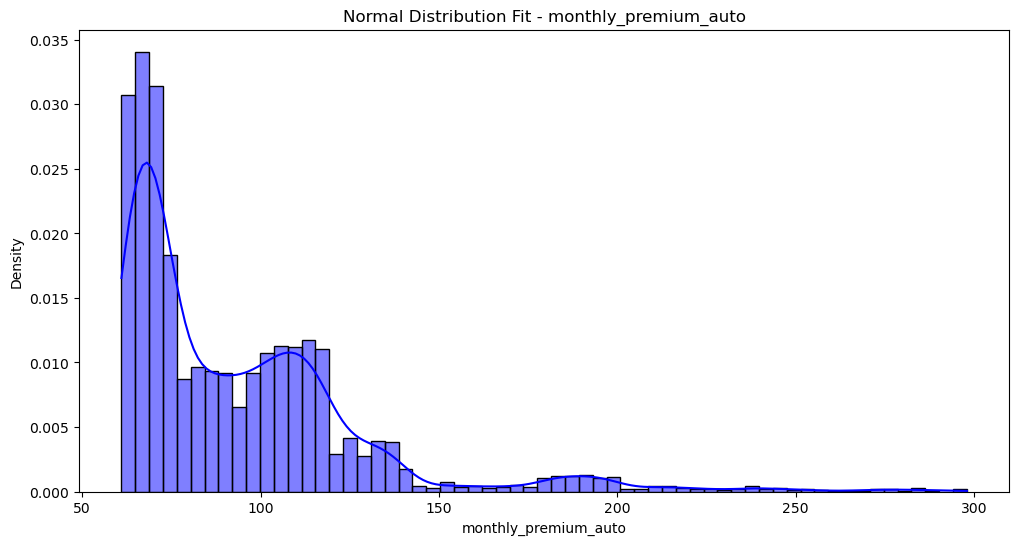

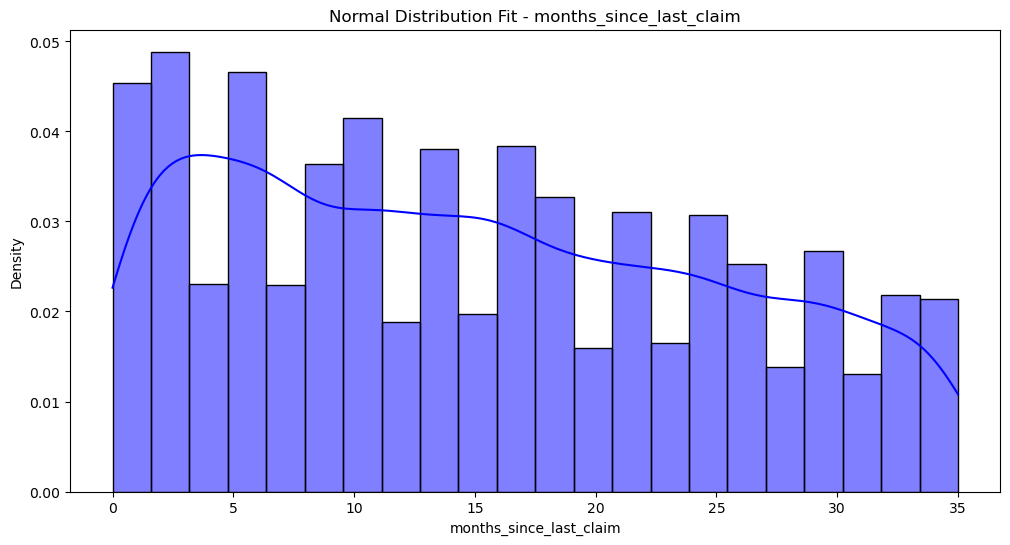

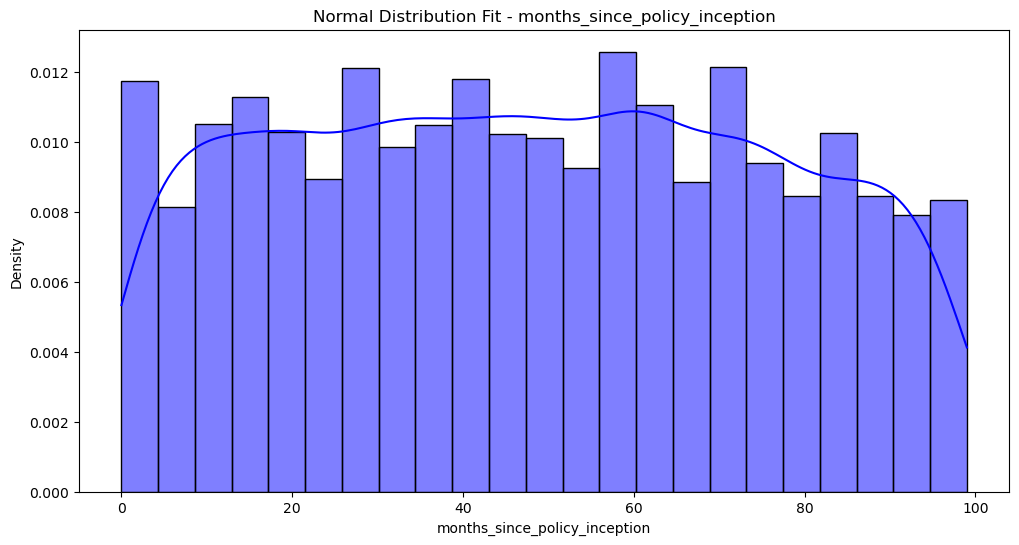

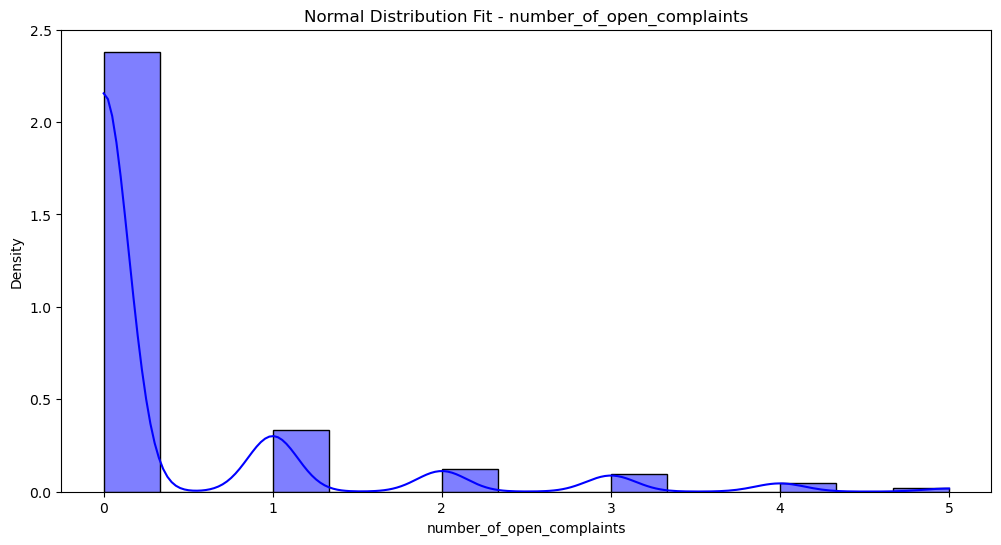

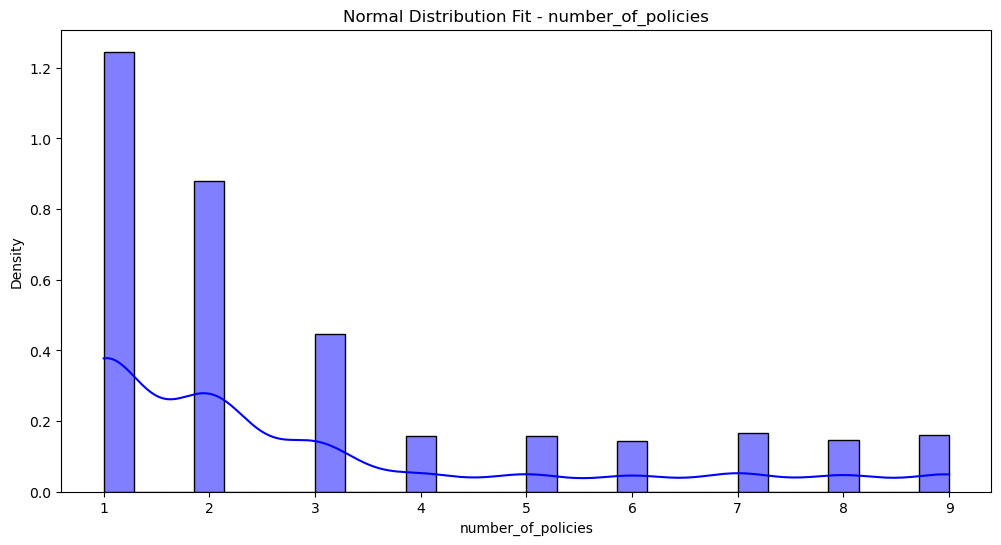

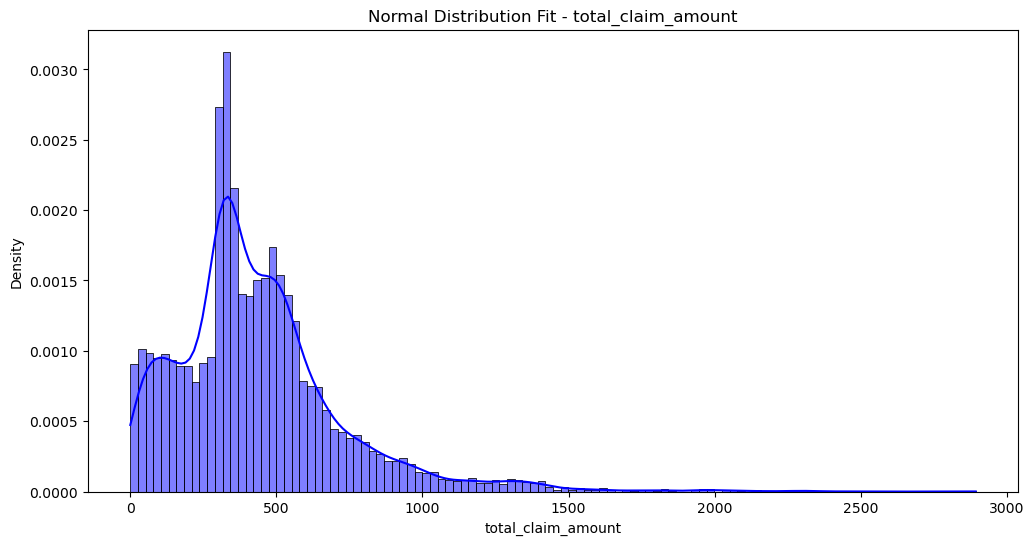

In [28]:
from scipy import stats
from scipy.stats import norm

# Loop through each numerical column
for column in numerical.columns:
    # Distribution plot for normal distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(numerical[column], kde=True, stat="density", color='blue')
    plt.title(f'Normal Distribution Fit - {column}')
    plt.show()


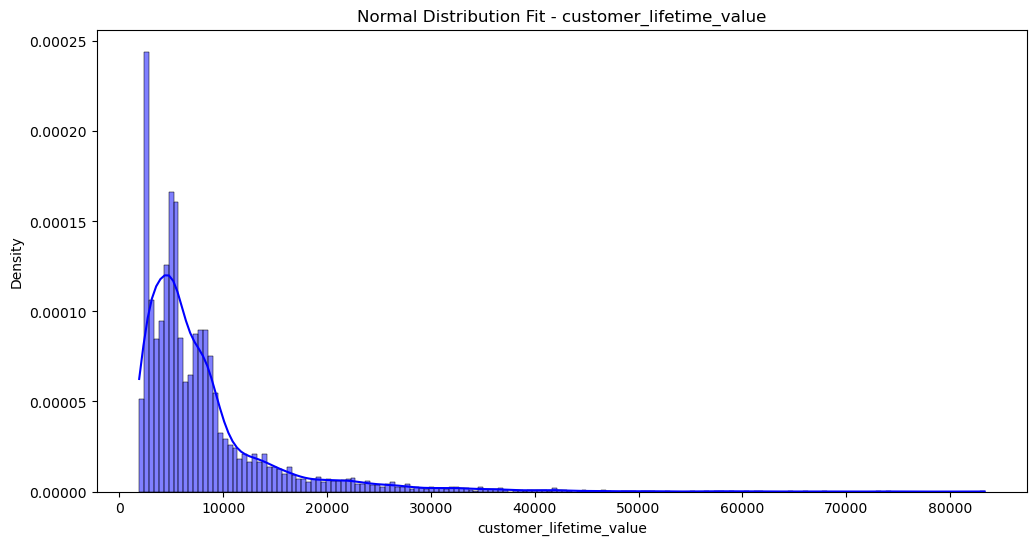

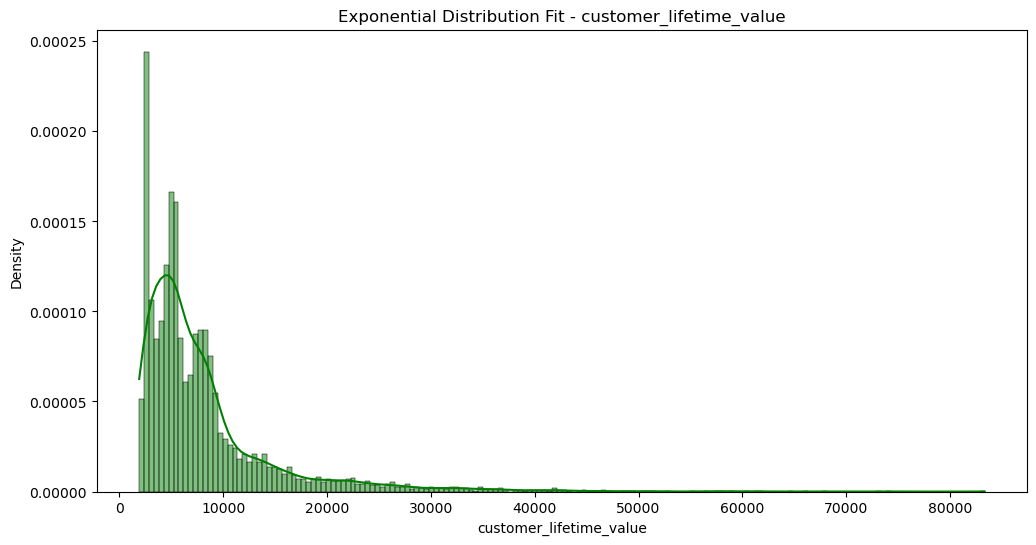

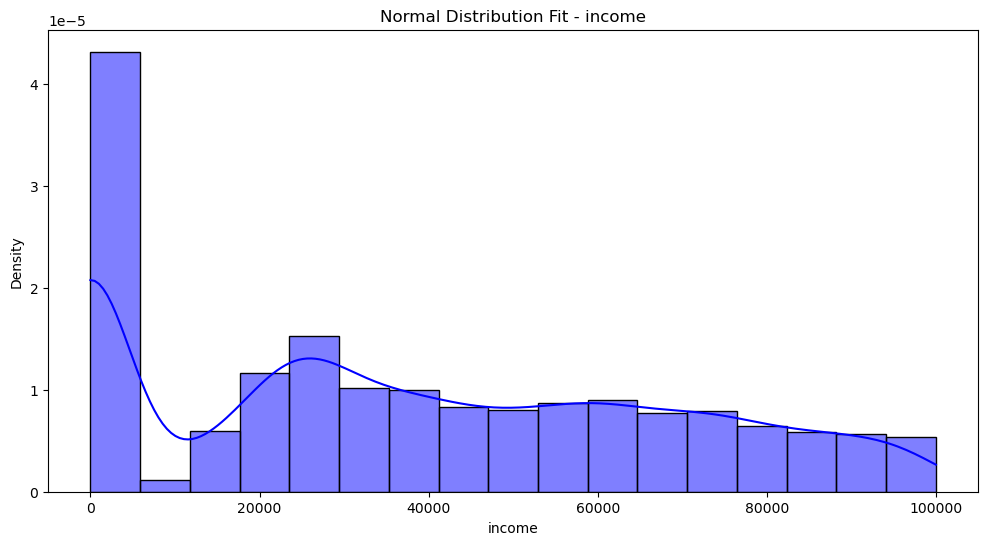

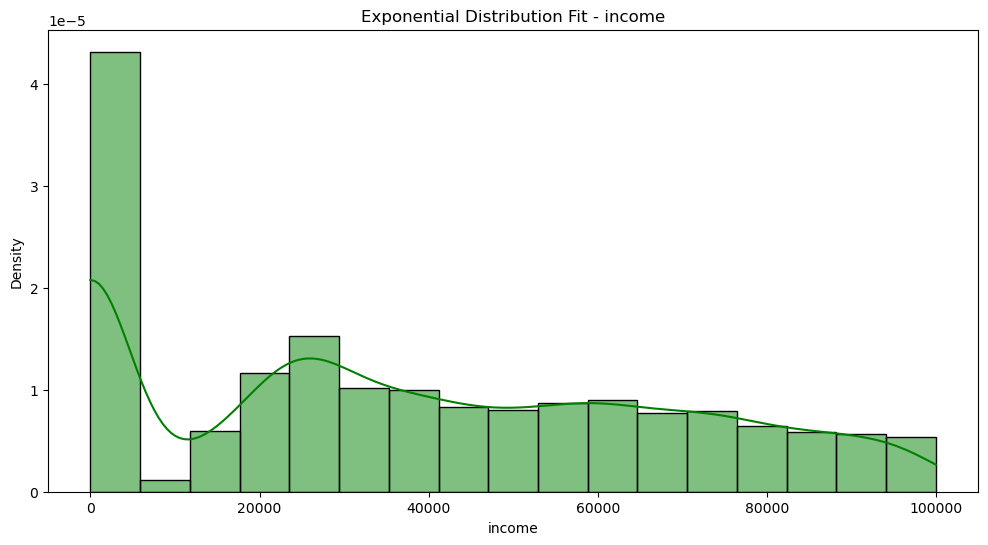

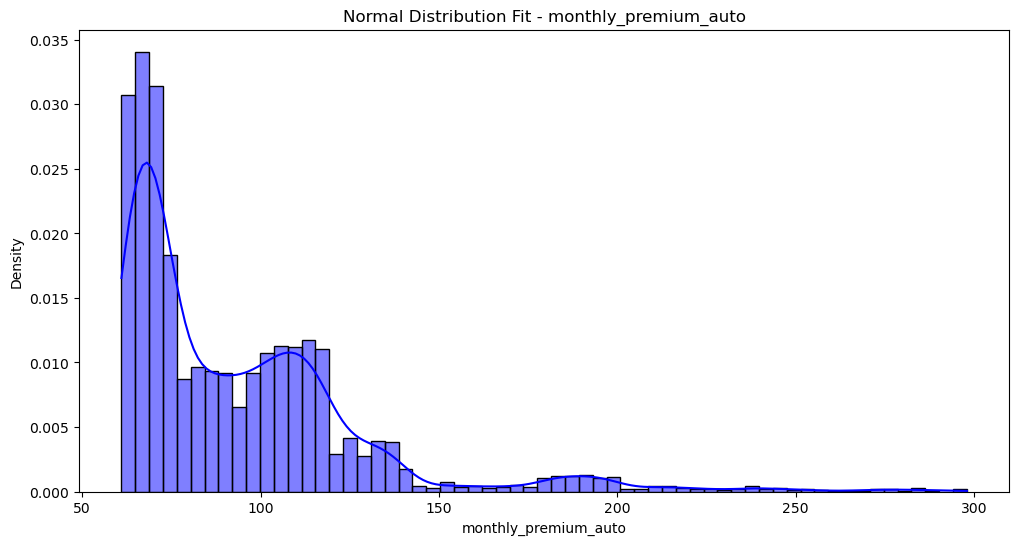

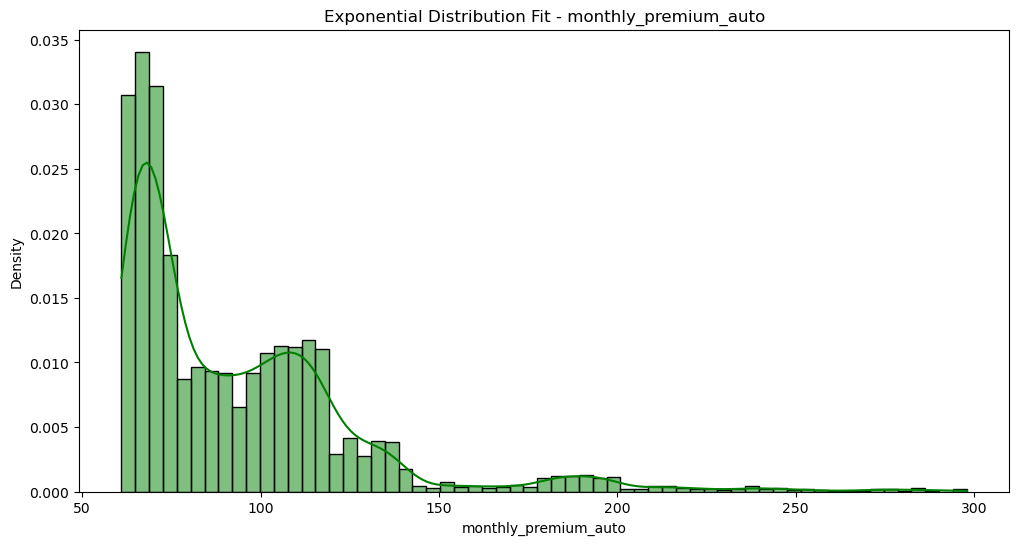

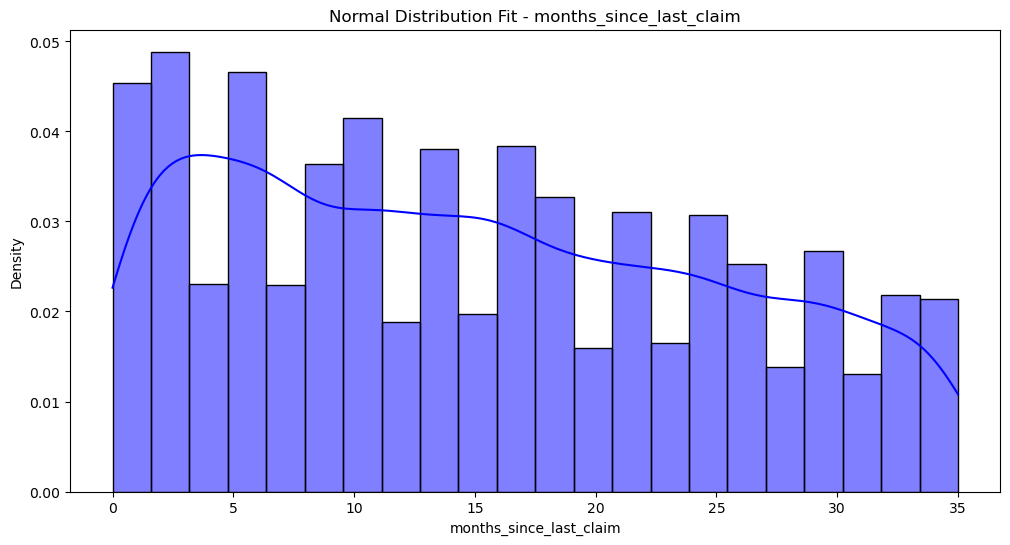

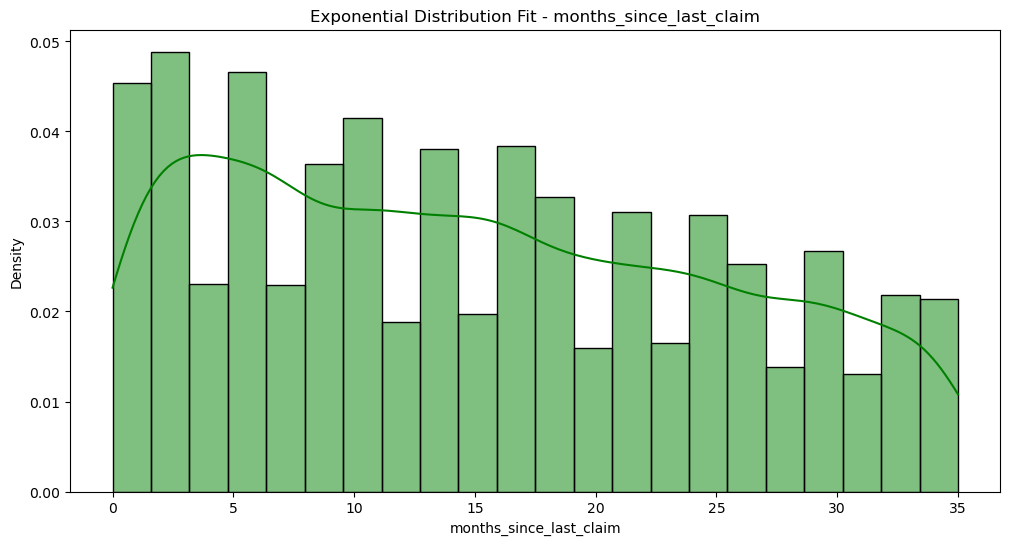

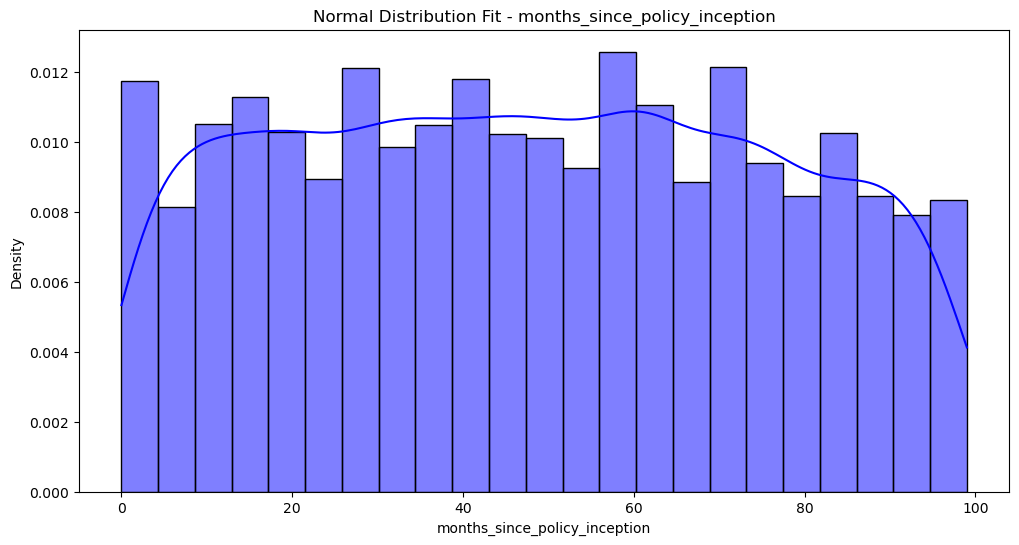

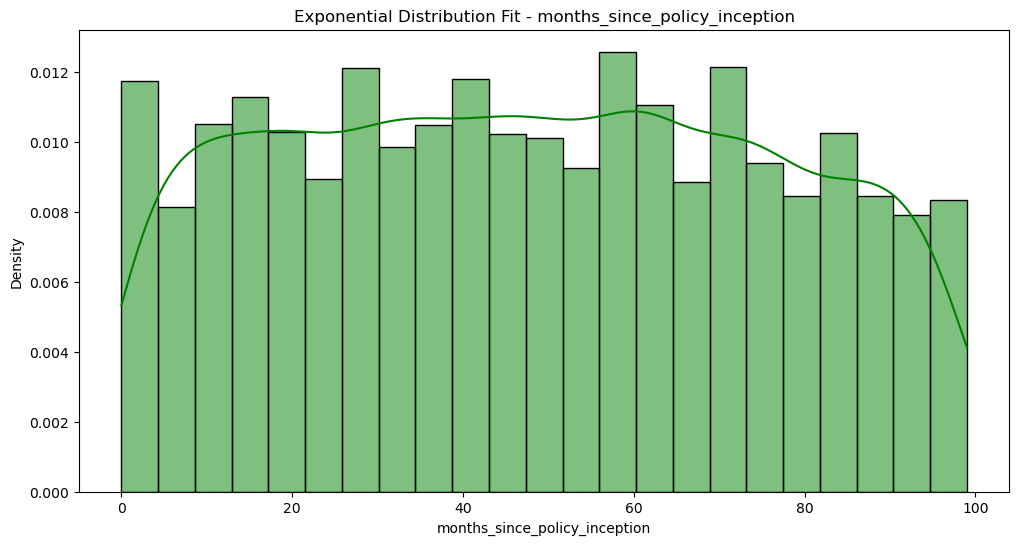

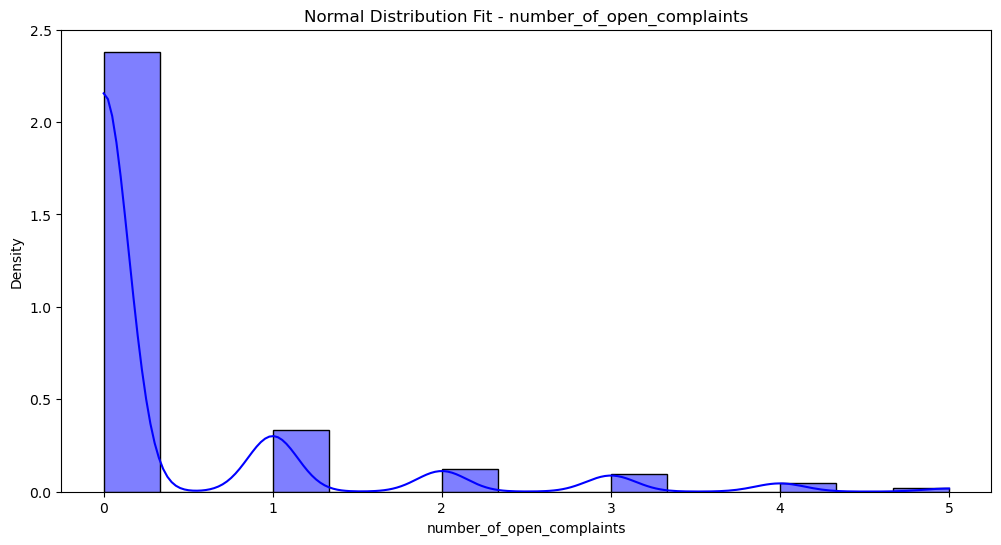

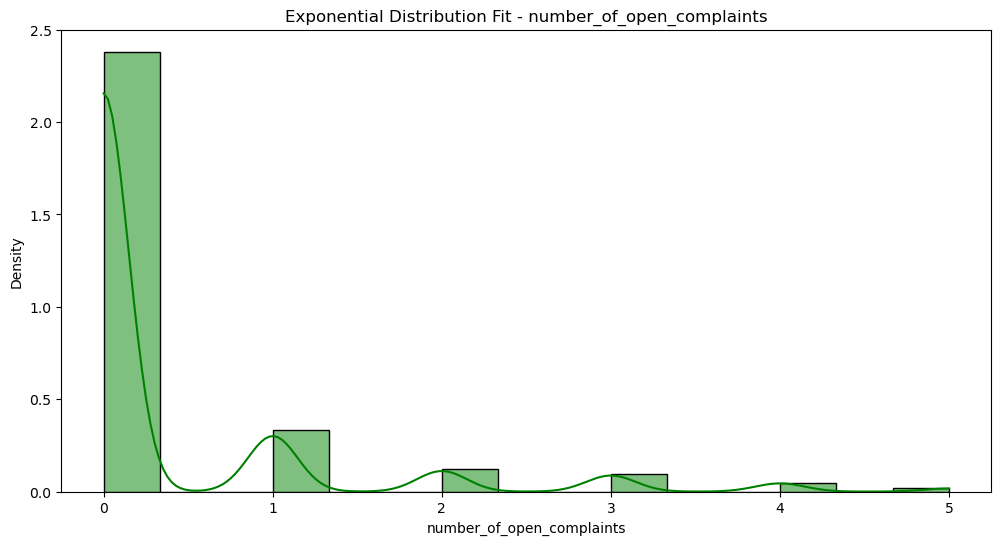

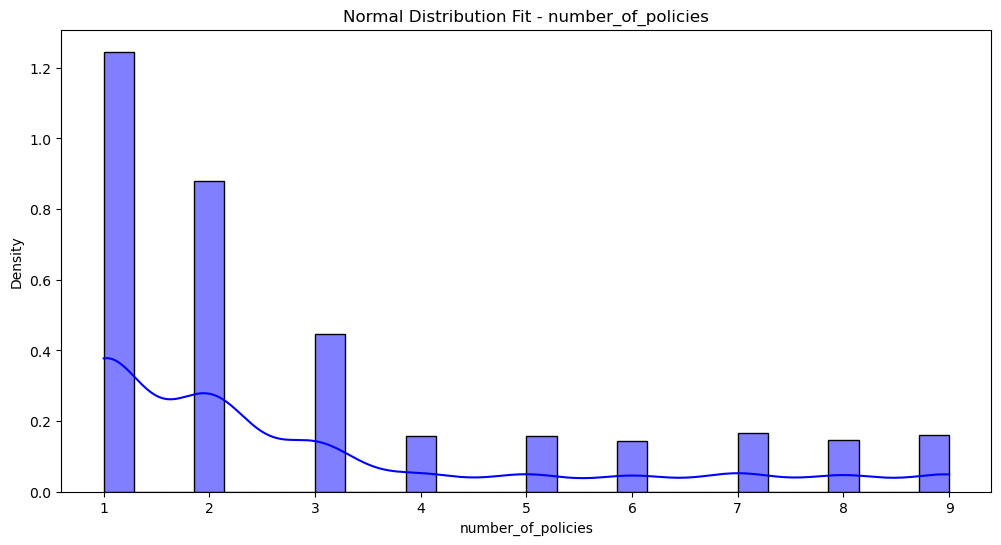

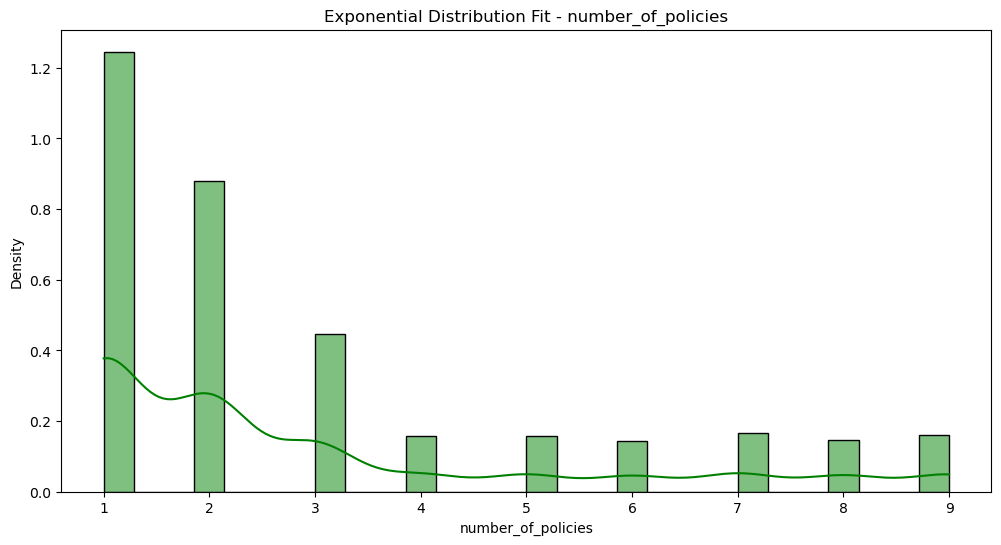

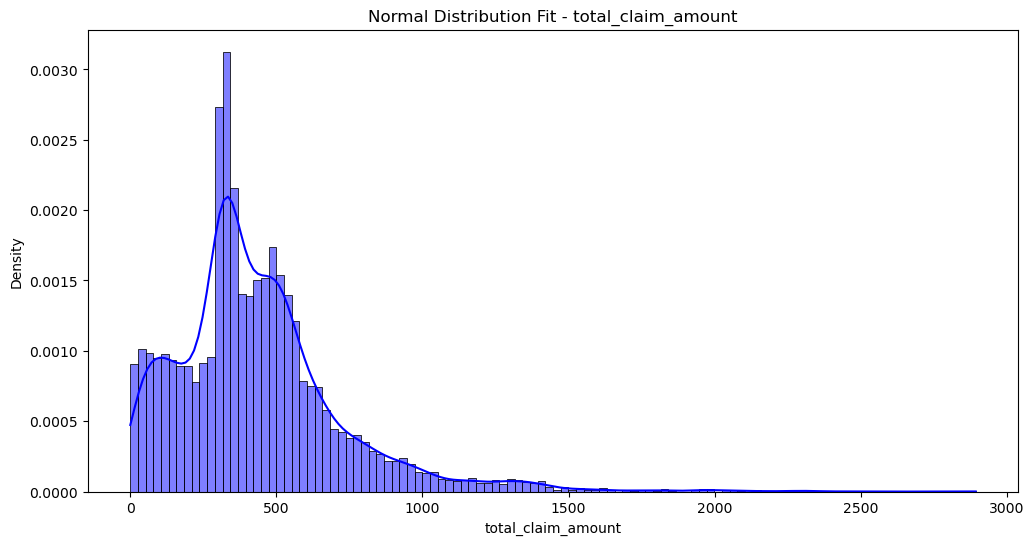

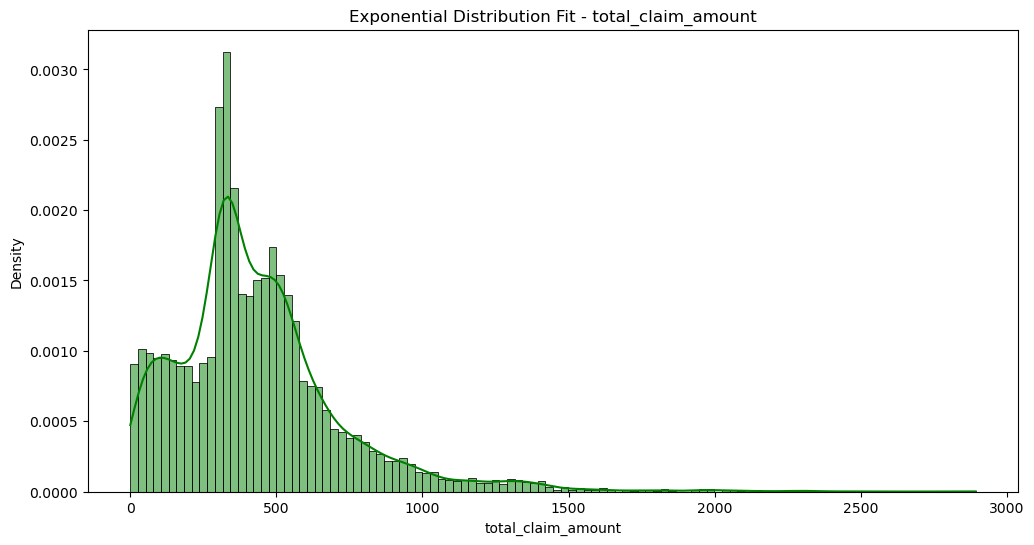

In [29]:
from scipy import stats
from scipy.stats import norm

# Loop through each numerical column
for column in numerical.columns:
    # Distribution plot for normal distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(numerical[column], kde=True, stat="density", color='blue')
    plt.title(f'Normal Distribution Fit - {column}')
    plt.show()

    # Distribution plot for exponential distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(numerical[column], kde=True, stat="density", color='green')
    plt.title(f'Exponential Distribution Fit - {column}')
    plt.show()

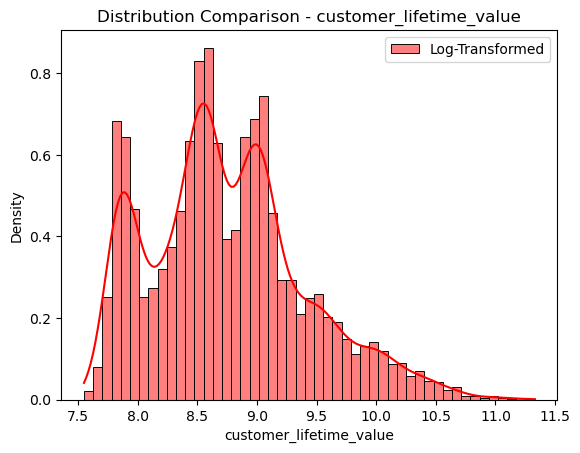

c:\Users\usuario\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


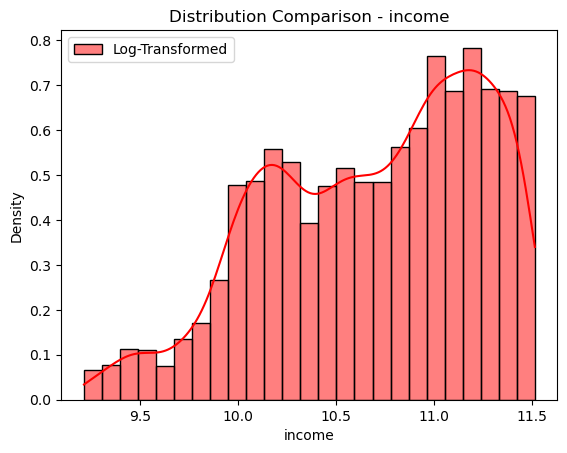

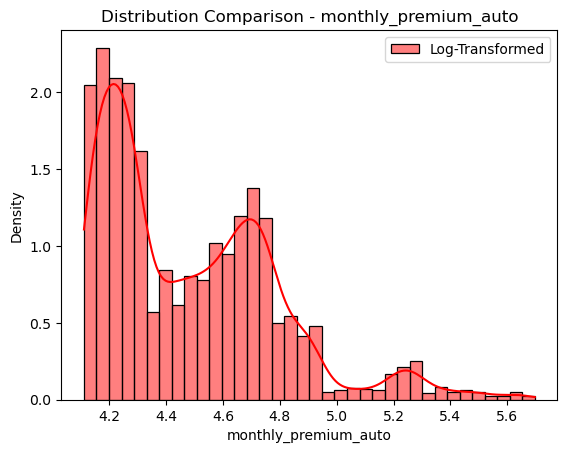

c:\Users\usuario\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


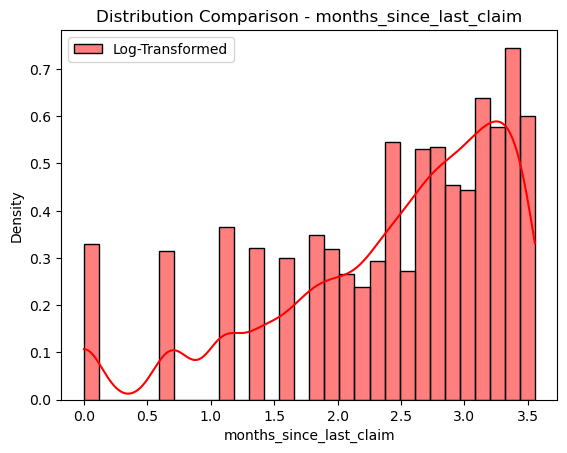

c:\Users\usuario\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


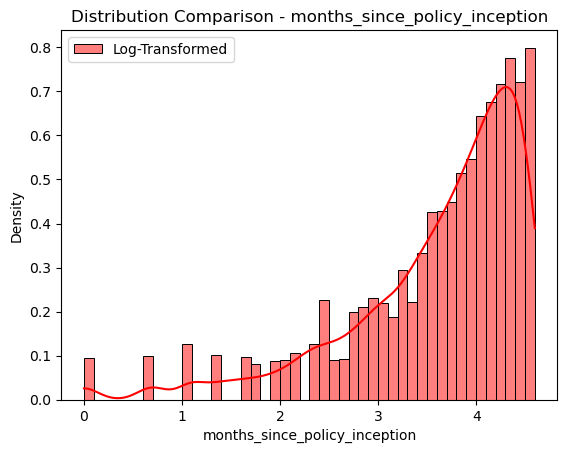

c:\Users\usuario\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


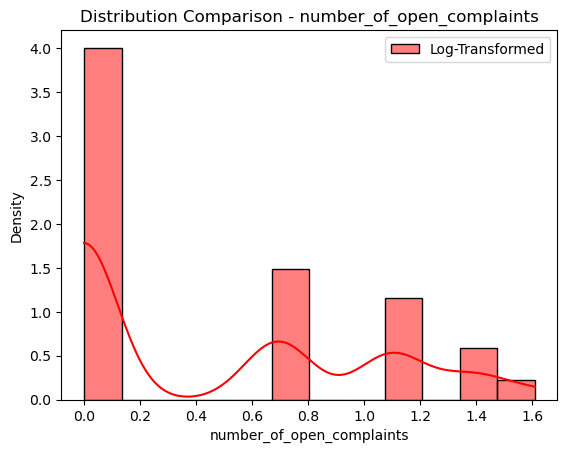

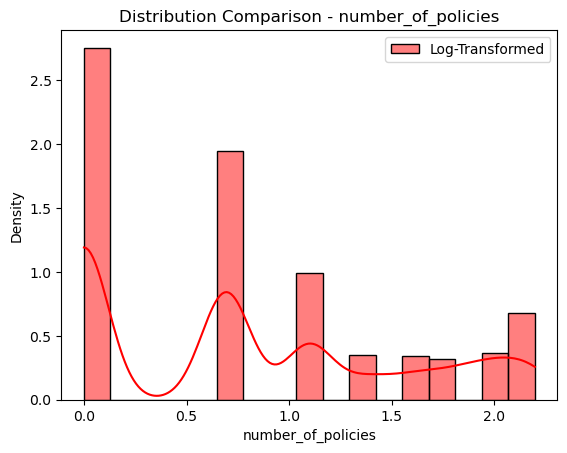

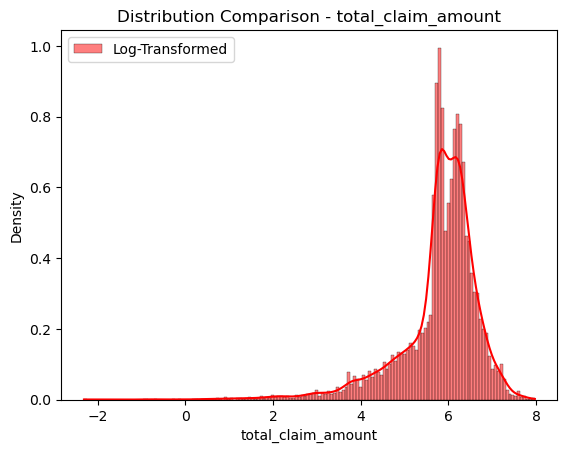

In [30]:
# Loop through each numerical column
for column in numerical.columns:
    

    # Log-transformed distribution
    log_data = np.log(numerical[column])  # Adding 1 to avoid log(0)
    sns.histplot(log_data, kde=True, stat="density", color='red', label='Log-Transformed')

    # Other transformations can be added here

    plt.title(f'Distribution Comparison - {column}')
    plt.legend()
    plt.show()